# Multiple Qubits and Entangled States

## 1. Representing Multi-Qubit States

単一ビットには2つの取りうる状態があり、qubitには2つの複素振幅があることを見てきました。同様に、2ビットには4つの状態があります。

00 01 10 11

また、2つのqubitの状態を説明するには、4つの複素振幅が必要になります。これらの振幅を次のように4Dベクトルに格納します。

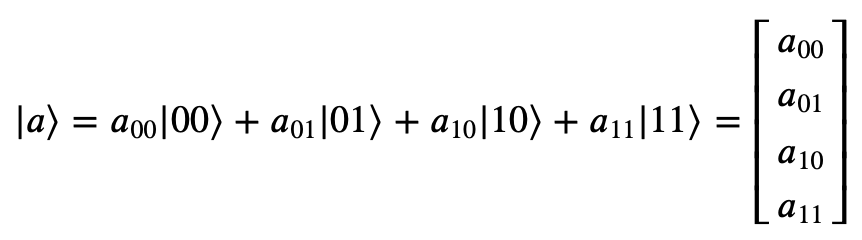

測定に関するルールはqubit数が増えても同様に機能します。

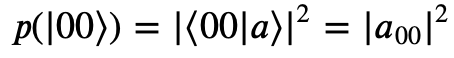

そして、正規化条件などの含意もそのまま保持されます。

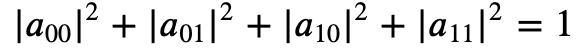

2つの分離したqubitがある場合、テンソル積を使用することでそれらの集団状態を記述することができます。

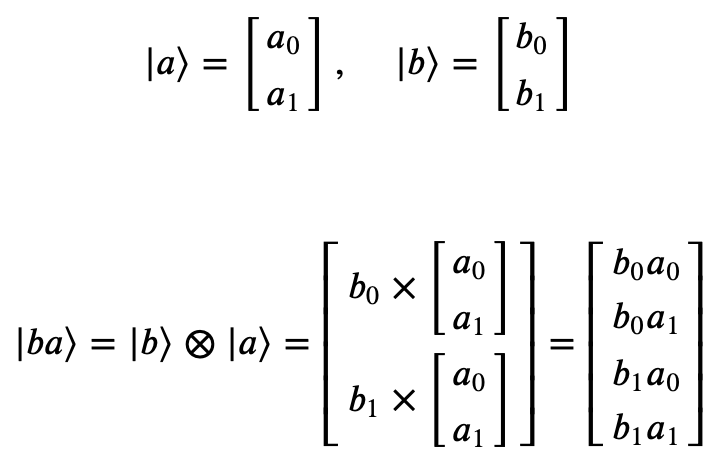

同じ規則に従って、テンソル積を使用することで、任意の数のqubitの集合状態を記述することができます。次の例は3つのqubitの場合です。

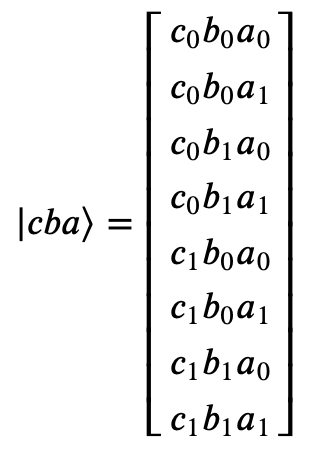

もしn個のqubitがあれば、2^nの複素振幅を追跡する必要があります。

ここまで見て分かる通り、これらのベクトルはqubitの数とともに指数関数的に増加します。これが、多数のqubitを持つ量子コンピュータあのシミュレーションが非常に難しい理由です。現代のノートパソコンは約20qubitの一般的な量子状態を簡単にシミュレートできますが、100qubitになると、最高性能のスーパーコンピュータでもシミュレートするのは難しいです。

In [1]:
from qiskit import *
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram

In [2]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

一つ一つのqubitは|+>状態です。そのベクトルは次のようになっています。

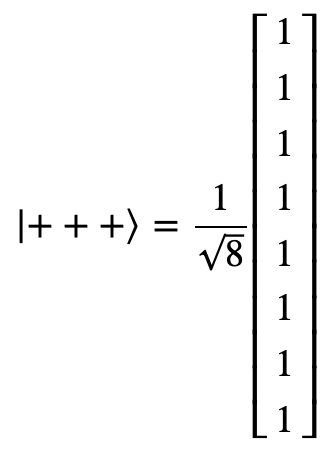

## 2. Single Qubit Gates on Multi-Qubit Statevectors

Xゲートが次のような行列で表されることは既に見てきました。

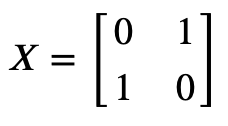

そして、Xゲートが|0>状態のqubitに対して次のように動作することも見てきたと思います。

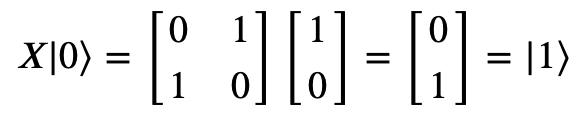

しかし、Xゲートがマルチキュービットベクトルのqubitにどのように作用するかはまだ明らかにしていません。幸い、ルールは非常に単純です。テンソル積を使用して、マルチキュービット状態ベクトルを計算するのと同じように、テンソル積を使用して、これらの状態ベクトルに作用する行列を計算します。例えば、次の回路では

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

テンソル積を使用して同時操作(H & X)を表すことができます。

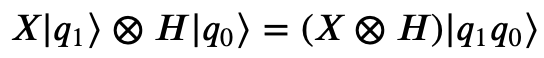

その演算は次のようになっています。

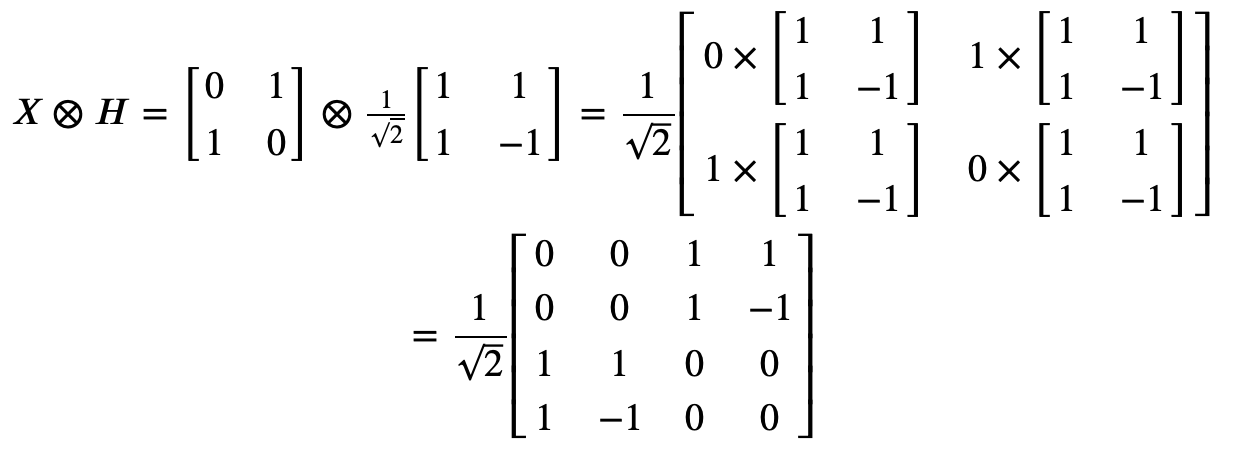

これを4D状態ベクトル|q1q0>に適用できます。これは非常に煩雑になる可能性があり、より明確な表記がよく使われます。

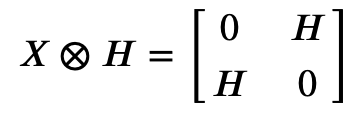

これ手動で計算する代わりに、Qiskitの"unitary_simulator"を使って計算することができます。unitary_simulatorは、回路内の全てのゲートを乗算して、量子回路全体を実行する単一のユニタリー行列をコンパイルします。

In [4]:
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()

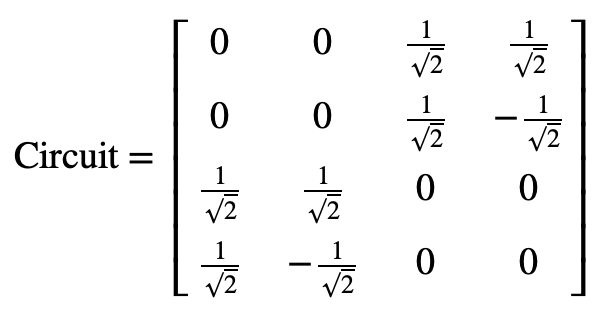

ゲートを一度に1つのqubitのみに適用する場合(以下の回路のように)、恒等行列を使用して、テンソル積を計算します。

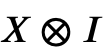

In [5]:
qc = QuantumCircuit(2)
qc.x(1)
qc.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘

これで、Qiskitがテンソル積を実行したことが確認できます。

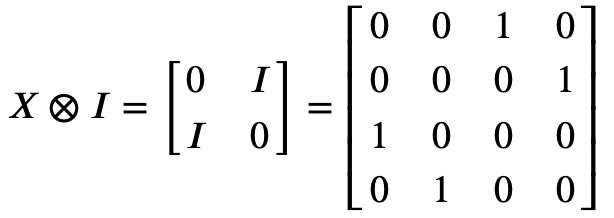

## 3. Multi-Qubit Gates

複数のqubitの状態を表す方法がわかりました。これで、qubitが互いにどのように相互作用するのかを学習する準備が整いました。重要な2qubitゲートはCNOTゲートです。

### 3.1 The CNOT-Gate

以前、"The Atom of Computation"の回でこのゲートを見たと思います。このゲートは、最初のqubit(制御)の状態が|1>の時、2つ目のqubit(ターゲット)でXゲートを実行する条件付きゲートです。ゲートは、q0をコントロール、q1をターゲットとして、次のような回路として描画されます。

In [6]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit:
qc.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

2つのqubitが重ねあわせの状態にない時(古典ビットと同じような状態にある時)、CNOTゲートはとてもシンプルで、直感的に理解できました。

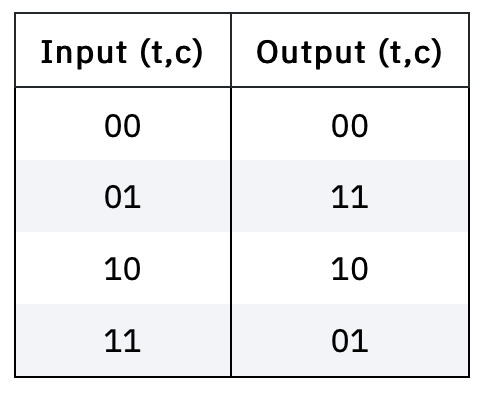

そして、4Dの状態ベクトルでは、次のような2つの行列で表すことができました。

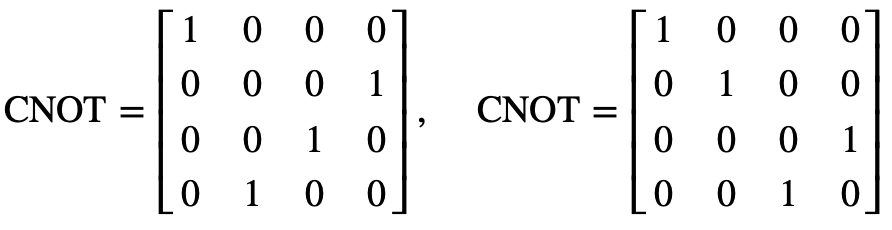

ただし、どちらを制御ビットとし、どちらをターゲットビットとするかによって表し方は異なり、これは本やシミュレータ、論文によってこの順序は異なります。私たちの場合、左の行列は上の回路のCNOTに対応しています。この行列は、状態ベクトル|01>と|11>の振幅を入れ替えます。

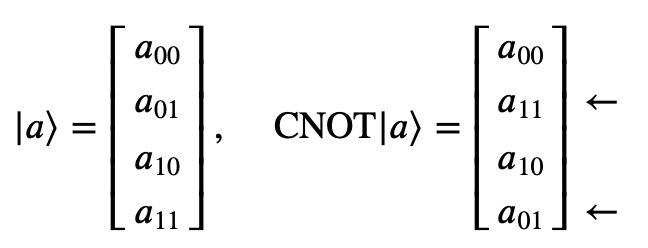

ここまで、CNOTゲートが古典ビットにどのように作用するかを見てきました。
ここからは、superposition状態のqubitに対してどのように作用するかを見ていきましょう。|+>状態のqubitを1つおきました。

In [7]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw()

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────

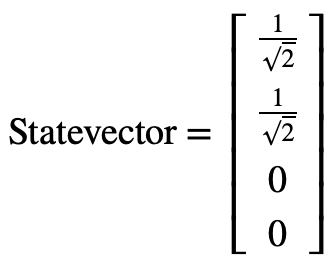

予想通り、|0⟩⊗|+⟩=|0+⟩という状態が生成されました。

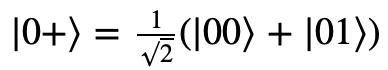

では、ここにCNOTゲートを適用して、どうなるか見てみましょう。

In [10]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

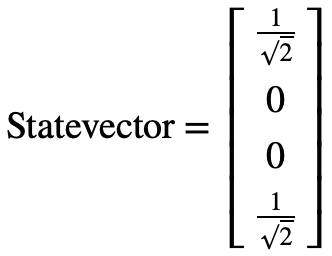

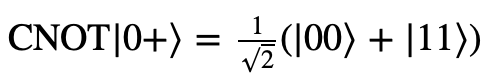

絡み合っているので、この状態は私たちにとって非常に興味深いものとなりました。これで、次のセクションに綺麗に進むことができます。

### 3.2 Entangled States

前のセクションで次のような状態を作り出すことができました。

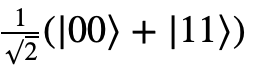

これは"Bell state(ベル状態)"として知られています。

この状態は、|00>の状態で測定される確率が50%であり、|11>の状態で測定される確率も50%であることがわかります。そして、とても興味深いことに、|01>または|10>の状態で測定される可能性は0%なのです。これはQiskitで確認することができます。

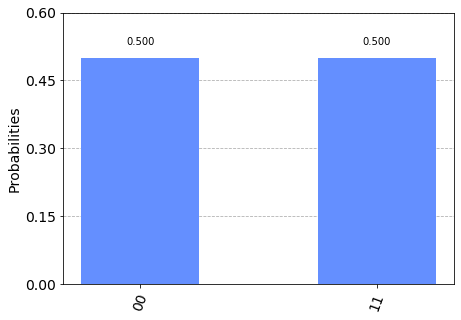

In [11]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

この結合された状態は、興味深いことに、2つの別々のqubit状態として記述することができません。私たちのqubitは重ね合わせ状態ですが、一方を測定すると、もう一方の状態がわかり、重ね合わせの状態が崩壊してしまいます。例えば、上のqubitを測定して、状態|1>を取得した場合、qubitの集合状態は次のように変化します。

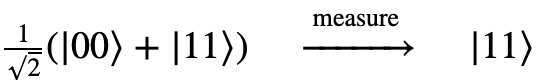

これらのqubitを何光年離れたところにおいても、1つのqubitを測定すると重ね合わせが崩壊し、他のqubitにすぐに影響を与えているように見えます。これは20世紀初頭に多くの物理学者を動揺させた"spooky action at a distance"です。

ただし、測定結果はあくまでもランダムであり、1つのqubitの測定統計は他のqubitの操作の影響を受けないことに注意する必要があります。この為、共有量子状態を使用して通信する方法は存在しません。これは"no-communication theorem"として知られています。